🔧 FEATURE ENGINEERING AUTOMÁTICO
📋 Configuración de Feature Engineering:
   time_features: True
   lags: [1, 24, 48, 168]
   rolling: {'windows': [24], 'functions': ['mean', 'std']}
   interactions: [['demand_factor', 'operational_efficiency'], ['temperature', 'demand_factor']]
   squared_terms: ['temperature']
✅ Dataset raw cargado desde: ../data/raw/industrial_timeseries.csv
   Shape: (17520, 10)
   Columnas: ['timestamp', 'value', 'temperature', 'demand_factor', 'operational_efficiency', 'energy_price', 'hour', 'day_of_week', 'month', 'is_weekend']
   Rango temporal: 2022-01-01 00:00:00 a 2023-12-31 23:00:00

📊 Dataset original: (17520, 10)
🚀 INICIANDO FEATURE ENGINEERING
🕐 Creando features temporales...
   ✅ Creadas: hour, day_of_week, month, quarter, is_weekend
⏰ Creando features de lag: [1, 24, 48, 168]...
   ✅ Creado: lag_1h
   ✅ Creado: lag_24h
   ✅ Creado: lag_48h
   ✅ Creado: lag_168h
📊 Creando rolling features: windows=[24], functions=['mean', 'std']...
   ✅ Creado: rolling_

,quarter,lag_1h,lag_24h,lag_48h,lag_168h,rolling_mean_24h,rolling_std_24h,demand_factor_operational_efficiency_interaction,temperature_demand_factor_interaction,temperature_squared
count,17352.00,17352.00,17352.00,17352.00,17352.00,17352.00,17352.00,17352.00,17352.00,17352.00
mean,2.52,1456.92,1456.57,1456.15,1454.18,1456.77,48.26,0.55,12.52,549.72
std,1.11,111.55,111.53,111.60,111.17,100.48,10.52,0.23,9.44,512.88
min,1.00,973.89,973.89,973.89,973.89,1204.28,17.60,0.00,-10.16,0.00
25%,2.00,1379.48,1379.10,1378.58,1376.36,1383.39,40.63,0.37,5.22,108.58
50%,3.00,1459.43,1459.00,1458.59,1456.70,1457.75,47.02,0.55,10.98,401.20
75%,4.00,1537.99,1537.52,1537.10,1534.78,1532.40,55.03,0.74,18.46,871.43
max,4.00,1758.40,1758.40,1758.40,1758.40,1693.97,99.77,1.00,47.68,2290.58



📈 VISUALIZACIÓN: NUEVAS FEATURES vs TARGET


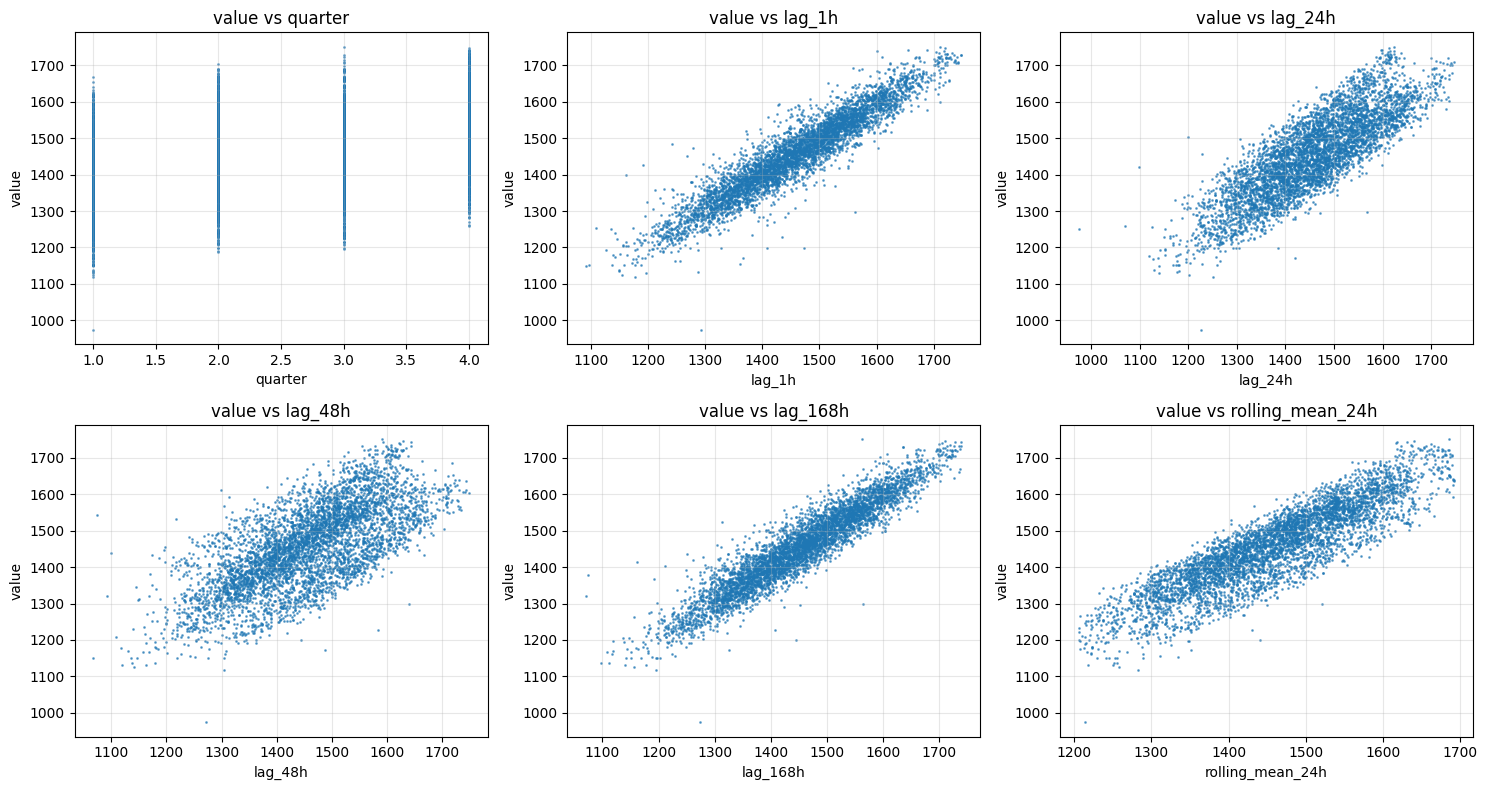

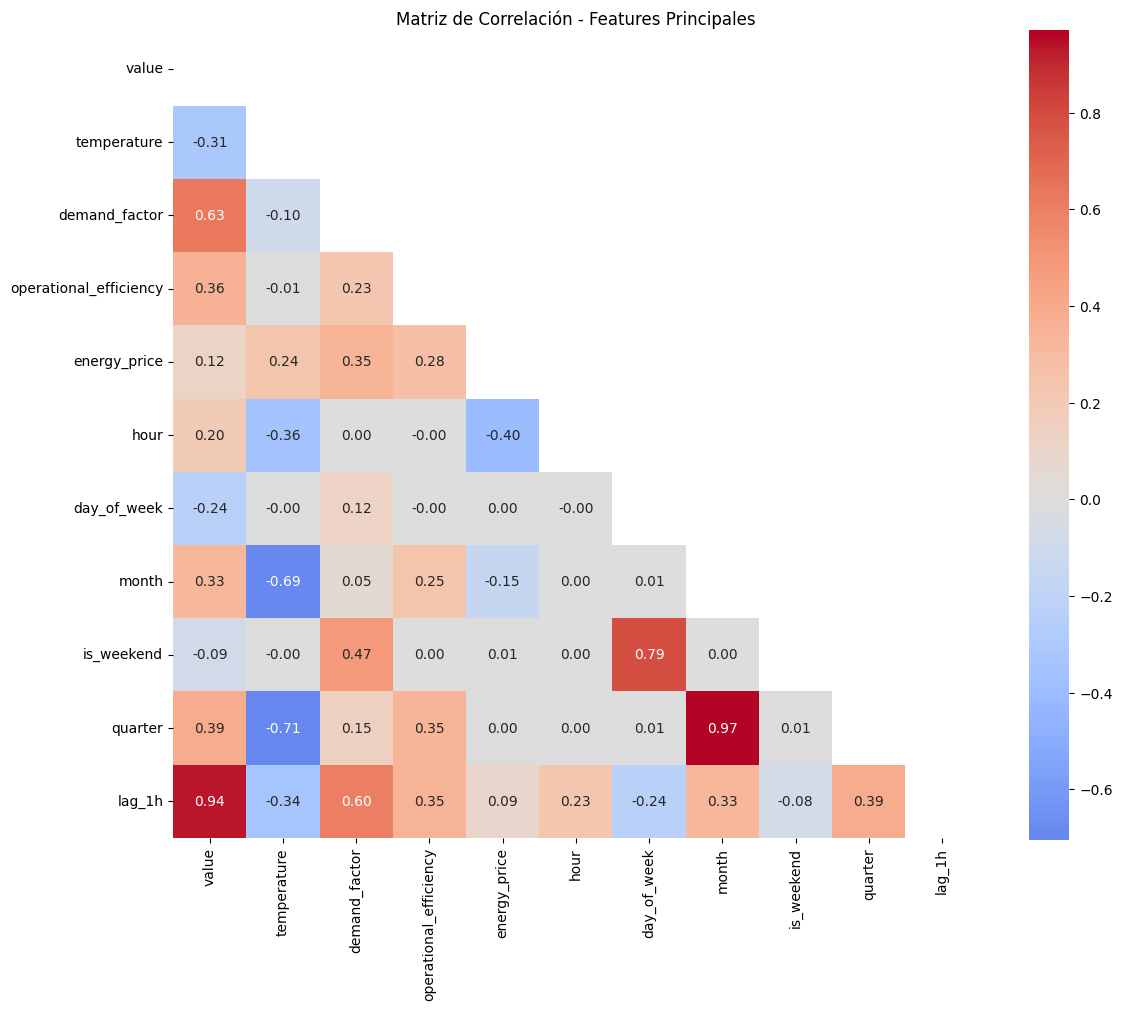


🎯 TOP 10 CORRELACIONES CON value:
    1. lag_1h:  0.937
    2. demand_factor:  0.631
    3. quarter:  0.393
    4. operational_efficiency:  0.356
    5. month:  0.330
    6. temperature: -0.313
    7. day_of_week: -0.236
    8. hour:  0.198
    9. energy_price:  0.115
   10. is_weekend: -0.085

💾 Dataset procesado guardado en: data/processed/industrial_timeseries_featured.csv
   Forma: (17352, 20)

✅ FEATURE ENGINEERING COMPLETADO
   Dataset procesado guardado en: data/processed/industrial_timeseries_featured.csv
   Listo para entrenamiento de modelos!

🔍 VERIFICACIÓN DE CALIDAD:
   Valores nulos: 0
   Valores infinitos: 0
   Duplicados: 0
   ✅ No hay valores nulos
   ✅ No hay valores infinitos


In [5]:
# Feature Engineering - Automático

## Objetivo:
### ✔ Aplicar feature engineering según config
### ✔ Proceso completamente configurable
### ✔ Guardar dataset procesado

import sys
sys.path.append('../src')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # ← AGREGAR ESTA LÍNEA
import numpy as np
from data_loader import load_raw
from features.feature_engineering import FeatureEngineeringEngine
from config_loader import load_config

# Cargar configuración y datos
print("🔧 FEATURE ENGINEERING AUTOMÁTICO")
print("=" * 50)

config = load_config("../config.yaml")  # ← AGREGAR RUTA RELATIVA
print("📋 Configuración de Feature Engineering:")
fe_config = config.get('feature_engineering', {})
for key, value in fe_config.items():
    print(f"   {key}: {value}")

# Cargar datos originales
df_original = load_raw("../config.yaml")  # ← AGREGAR RUTA RELATIVA
print(f"\n📊 Dataset original: {df_original.shape}")

# Inicializar motor de feature engineering
fe_engine = FeatureEngineeringEngine("../config.yaml")  # ← AGREGAR RUTA RELATIVA

# Aplicar transformaciones
df_featured = fe_engine.transform(df_original)

print(f"\n📈 RESUMEN DE TRANSFORMACIONES:")
print(f"   Columnas originales: {len(df_original.columns)}")
print(f"   Columnas finales: {len(df_featured.columns)}")
print(f"   Nuevas features: {len(df_featured.columns) - len(df_original.columns)}")
print(f"   Filas originales: {len(df_original):,}")
print(f"   Filas finales: {len(df_featured):,}")

# Mostrar nuevas columnas creadas
original_cols = set(df_original.columns)
new_cols = [col for col in df_featured.columns if col not in original_cols]
print(f"\n🆕 NUEVAS FEATURES CREADAS:")
for col in new_cols:
    print(f"   • {col}")

# Obtener columnas de features para modelado
feature_columns = fe_engine.get_feature_columns(df_featured)
target_col = fe_engine.target_col

print(f"\n🎯 COLUMNAS PARA MODELADO:")
print(f"   Features ({len(feature_columns)}): {feature_columns}")
print(f"   Target: {target_col}")

# Estadísticas de las nuevas features
if new_cols:
    print(f"\n📊 ESTADÍSTICAS DE NUEVAS FEATURES:")
    display(df_featured[new_cols].describe().round(2))

# Visualizar algunas de las nuevas features vs target
if len(new_cols) > 0:
    print(f"\n📈 VISUALIZACIÓN: NUEVAS FEATURES vs TARGET")
    
    # Seleccionar hasta 6 features para visualizar
    features_to_plot = new_cols[:6]
    n_features = len(features_to_plot)
    
    if n_features > 0:
        # Calcular grid
        n_cols = min(3, n_features)
        n_rows = (n_features + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
        
        # Manejar caso de un solo subplot
        if n_features == 1:
            axes = [axes]
        elif n_rows == 1 and n_cols > 1:
            axes = list(axes)
        elif n_rows > 1:
            axes = axes.flatten()
        
        # Muestrear datos para visualización más rápida
        sample_size = min(5000, len(df_featured))
        df_sample = df_featured.sample(n=sample_size, random_state=42)
        
        for i, feature in enumerate(features_to_plot):
            if i < len(axes):
                axes[i].scatter(df_sample[feature], df_sample[target_col], 
                               alpha=0.6, s=1)
                axes[i].set_xlabel(feature)
                axes[i].set_ylabel(target_col)
                axes[i].set_title(f'{target_col} vs {feature}')
                axes[i].grid(True, alpha=0.3)
        
        # Ocultar ejes sobrantes
        if isinstance(axes, list) and len(axes) > n_features:
            for i in range(n_features, len(axes)):
                axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()

# Matriz de correlación de features importantes
important_features = [target_col] + feature_columns[:10]  # Top 10 + target
correlation_matrix = df_featured[important_features].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True)
plt.title('Matriz de Correlación - Features Principales')
plt.tight_layout()
plt.show()

# Correlaciones más altas con el target
target_correlations = correlation_matrix[target_col].drop(target_col).sort_values(key=abs, ascending=False)
print(f"\n🎯 TOP 10 CORRELACIONES CON {target_col}:")
for i, (feature, corr) in enumerate(target_correlations.head(10).items(), 1):
    print(f"   {i:2d}. {feature}: {corr:6.3f}")

# Guardar dataset procesado
save_path = fe_engine.save_processed_data(df_featured)

print(f"\n✅ FEATURE ENGINEERING COMPLETADO")
print(f"   Dataset procesado guardado en: {save_path}")
print(f"   Listo para entrenamiento de modelos!")

# Verificar calidad de los datos
print(f"\n🔍 VERIFICACIÓN DE CALIDAD:")
print(f"   Valores nulos: {df_featured.isnull().sum().sum()}")
print(f"   Valores infinitos: {np.isinf(df_featured.select_dtypes(include=[np.number])).sum().sum()}")
print(f"   Duplicados: {df_featured.duplicated().sum()}")

if df_featured.isnull().sum().sum() == 0:
    print("   ✅ No hay valores nulos")
else:
    print("   ⚠️  Hay valores nulos")

if not np.isinf(df_featured.select_dtypes(include=[np.number])).any().any():
    print("   ✅ No hay valores infinitos")
else:
    print("   ⚠️  Hay valores infinitos")